In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models, optimizers
from IPython.display import HTML
import keras

In [2]:
BATCH_SIZE = 16
IMAGE_SIZE = (256, 256)

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=42,
)

Found 30 files belonging to 3 classes.


In [3]:
class_names = dataset.class_names
class_names

['ball', 'cake', 'guitar']

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    print(image_batch)

(16, 256, 256, 3)
[2 0 1 0 0 0 1 2 0 2 2 2 1 1 0 1]
tf.Tensor(
[[[[2.17750000e+02 2.24500000e+02 2.20250000e+02]
   [2.19000000e+02 2.19000000e+02 2.17000000e+02]
   [2.40000000e+02 2.33250000e+02 2.29750000e+02]
   ...
   [1.67250000e+02 1.69000000e+02 1.64000000e+02]
   [1.60750000e+02 1.54500000e+02 1.52000000e+02]
   [1.58750000e+02 1.56500000e+02 1.49250000e+02]]

  [[2.35250000e+02 2.35750000e+02 2.33500000e+02]
   [2.16250000e+02 2.07250000e+02 2.10250000e+02]
   [2.41000000e+02 2.42000000e+02 2.41500000e+02]
   ...
   [1.72000000e+02 1.62000000e+02 1.60000000e+02]
   [1.72250000e+02 1.62000000e+02 1.60000000e+02]
   [1.52000000e+02 1.52000000e+02 1.44000000e+02]]

  [[2.34500000e+02 2.36000000e+02 2.29750000e+02]
   [2.46250000e+02 2.36250000e+02 2.37250000e+02]
   [2.31000000e+02 2.30750000e+02 2.28500000e+02]
   ...
   [1.76750000e+02 1.66750000e+02 1.65750000e+02]
   [1.62000000e+02 1.53750000e+02 1.50250000e+02]
   [1.63250000e+02 1.56250000e+02 1.49750000e+02]]

  ...

  [

2024-09-05 11:06:26.449852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-09-05 11:06:47.813144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


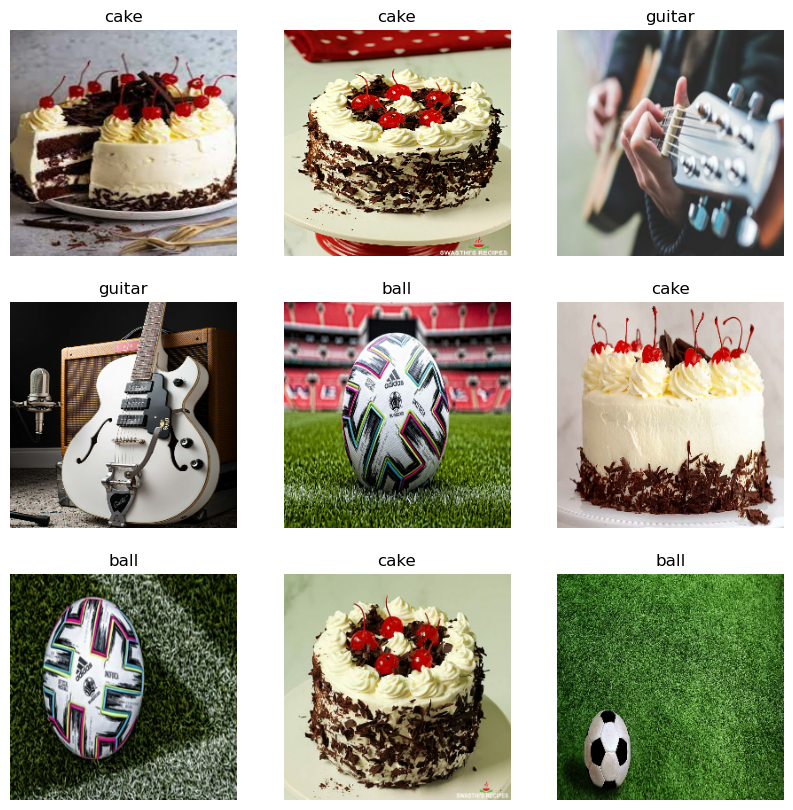

In [6]:
# Visualisation of am image from tf dataset
for image_batch, labels_batch in dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
def get_partitioned_datesets(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=42, reshuffle_each_iteration=False)

    dataset_size = len(dataset)
    train_size = int(train_split * dataset_size)
    train_dataset = dataset.take(train_size)
    dataset = dataset.skip(train_size)

    val_size = int(val_split * dataset_size)
    val_dataset = dataset.take(val_size)
    dataset = dataset.skip(val_size)

    test_size = dataset_size - train_size - val_size
    test_dataset = dataset.take(test_size)

    return train_dataset, val_dataset, test_dataset

In [8]:
train_dataset, val_dataset, test_dataset = get_partitioned_datesets(dataset)

In [10]:
IMAGE_SIZE = 256

resize_and_rescale = models.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [11]:
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
])

In [12]:
CHANNELS = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (16, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (16, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (16, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (16, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (16, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (16, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (16, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (16, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (16, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (16, 12544)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (16, 64)               │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (16, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,778 (3.42 MB)

 Trainable params: 896,778 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer=optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [15]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_dataset,
    verbose=1,
    epochs=10,
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0000e+00 - loss: 2.2976

2024-09-05 12:17:03.496026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/miniconda3/envs/dsi_participant/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


AttributeError: 'NoneType' object has no attribute 'items'